In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 15})
#%config InlineBackend.figure_format='retina'

Euler method의 파이썬 구현

In [2]:
def euler_ode(f, y0, x):
    
    def single_step(y, x, h):
        return y + h*f(x, y) #Euler formula Use it as it is
    
    y = [y0] * len(x) #x의 갯수만큼 y0의 값 자체를 늘려준다.(리스트만 만드는 꼴)
    for i, (x_curr, x_next) in enumerate(zip(x[:-1], x[1:])):
        #emuerate는 인덱스와 원소를 동시에 접근하면서 루프를 돌릴 수 있다. 튜플 꼴로 나옴.
        y_curr = y[i]
        dx     = x_next - x_curr
        y[i + 1] = single_step(y_curr, x_curr, dx) 
        #y0는 고정값이니 변하지 않지만 y_0+1 부터는 값이 계속 수정된다. 
        #즉 초기에 돌렸을 때는 0과 y1이 생기고, 그다음은 y[i] = y1이 되면서부터, 그때부터 다시 y[i + 1]의 값을 만든다.
        
        #또한, x의 범위의 간격 (횟수)번 만큼 반복시킨다. 즉 반복이 많아지면, 더욱 세밀하게 잘려지는거고(linspace때문에,) 그 잘린 횟수 만큼의
        #차가 곧, dx 그리고 그 값을 통해 y_n+1을 구해주고,
    return y

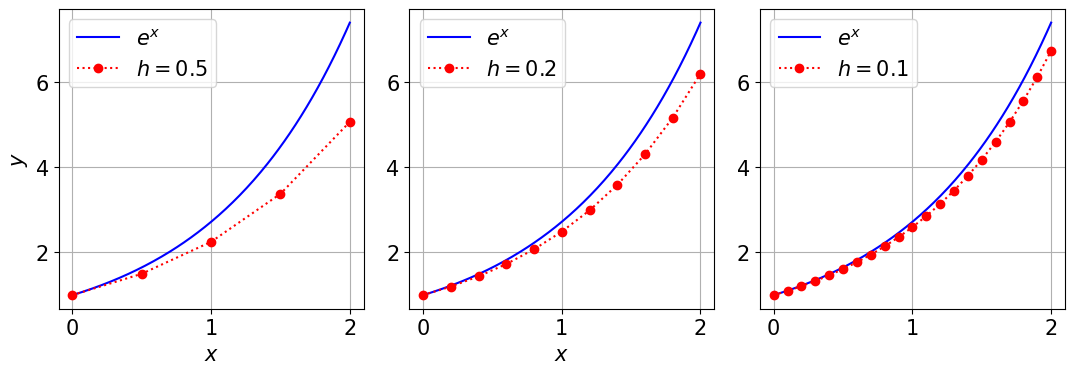

In [3]:
def f(x, y):
    return y

x_true = np.linspace(0, 2, 200)
y_true = np.exp(x_true)

plt.figure(figsize=[11, 4])

# 초기값은 x = 0 일때, y = 1 이므로 이를 대입시킨다.
# 오직 x의 간격을 통해 해를 발전시킨다. 간격이 좁으면 좁을 수록 더 정확도가 증가하고, 넓으면 정확도가 떨어진다.
plt.subplot(1, 3, 1)
x = np.linspace(0, 2, 5) #오직 간격만이 차이가 있다.
plt.plot(x_true, y_true, "-b", x, euler_ode(f, 1, x), "o:r")
plt.legend(["$e^x$", f"$h = {x[1] - x[0]}$"])
plt.grid()
plt.xlabel("$x$")
plt.ylabel("$y$")

plt.subplot(1, 3, 2)
x = np.linspace(0, 2, 11) #오직 간격만이 차이가 있다.
plt.plot(x_true, y_true, "-b", x, euler_ode(f, 1, x), "o:r")
plt.legend(["$e^x$", f"$h = {x[1] - x[0]}$"])
plt.grid()
plt.xlabel("$x$")

plt.subplot(1, 3, 3)
x = np.linspace(0, 2, 21) #오직 간격만이 차이가 있다.
plt.plot(x_true, y_true, "-b", x, euler_ode(f, 1, x), "o:r")
plt.legend(["$e^x$", f"$h = {x[1] - x[0]}$"])
plt.grid()
plt.xlabel
("$x$")

plt.tight_layout()
plt.show()

Error Analysis 를 loglog를 이용하여 나타내기.

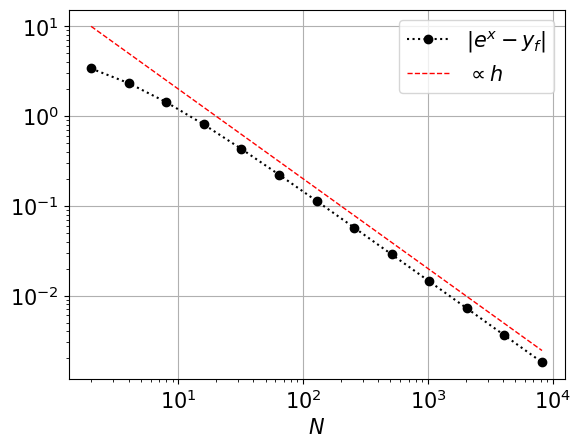

In [4]:
def f(x, y):
    return y

N = [2**i for i in range(1, 14)] 
error = [
    abs(np.exp(2) - euler_ode(f, 1, np.linspace(0, 2, n + 1))[-1]) 
    #n+1이 되는 이유는, 0, 1, 2 이렇게 중간값과 초기값, 끝값을 표현하기 위해서
    for n in N
]
# np.linspace(0, 2, n + 1) --> N이 2, 4, 8, 16 .... 1024 ... 이렇게 될때의 요소 하나 씩 만큼 갯수를 잘라줌
# 즉, 처음에는 0~2사이를 2번자르고, 그다음은 4번, 8번, 16번 ...
# 실제 값은, np.exp(2) 이니까, 이것에서 빼주는데, "x의 interval이 작으면 작을 수록" 어떻게 오차가 줄어드는지를 확인할 것이다.
plt.figure()

# ???????????????????# ???????????????????# ???????????????????# ???????????????????# ???????????????????
plt.loglog(N, error, 'o:k', label="$|e^x - y_f|$")
plt.loglog(N, [20 / n for n in N], '--r', lw=1, label="$\\propto h$")
# 왜 하필 20일까? --> 명확한 이유는 모르지만, 개념적 설명은 정리함.
# 이것은 dx 를 나타내는 것인데, 즉, 잘라낸 구간에서의 x_{n+1} - x_{n} 값을 나타내는 것.
# ???????????????????# ???????????????????# ???????????????????# ???????????????????# ???????????????????

plt.grid()
plt.xlabel("$N$")
plt.legend()
plt.show()

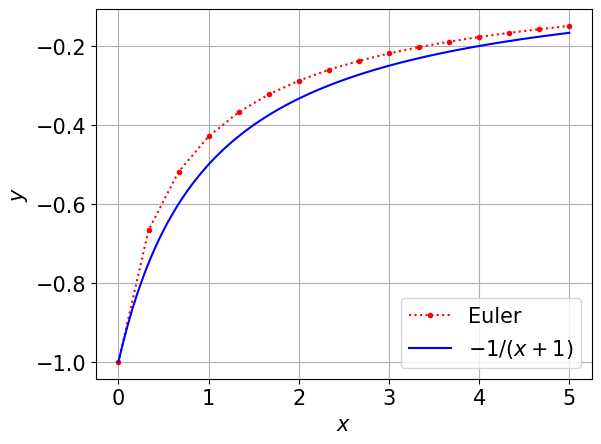

In [5]:
x_n = np.linspace(0, 5, 16)
y_0 = -1
y_n  = euler_ode(lambda x, y: y ** 2, y_0, x_n)

x_true = np.linspace(0, 5, 100)
y_true = -1 / (x_true + 1) 
#y' = y **2 의 실제 솔루션 y(x) = -1 / (x + 1)

plt.figure()
plt.plot(x_n, y_n, ".:r", x_true, y_true, "-b")
plt.legend(["Euler", "$-1/(x + 1)$"])
plt.grid()
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show()

Motion of Object Under Constant Gravity (행렬과 벡터로 나타내어 문제를 푸는 방법!!)

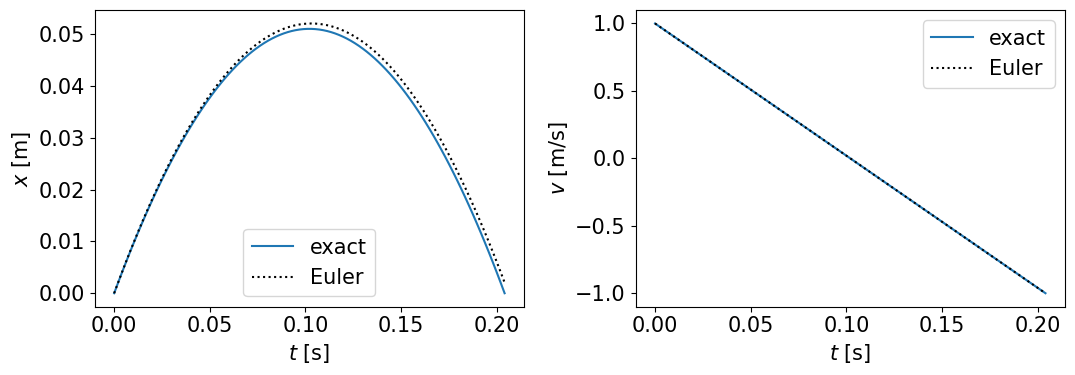

In [6]:
g = 9.8 #m/s
def F(t, Y): # F = [v, -g], Y = [x, v]
    F = [Y[1], -g] 
    #1차 상미분 방정식의 해를 구하기 위한 것. 이떄 Y[1] = v를 의미하는데, v는 t에 따라 변하는 값이기 때문에, 
    #변하는 v값을 넣기 보다, 이미 리스트가 만들어진 Y 리스트에서, Y[1]에 해당하는 모든 Y array에서 변하는 v에 해당하는 하나의 값만
    #넣어주면 된다.
    #print(Y[1])
    return np.array(F) #F면 안된다. array type으로 형태를 변환해야함. 

t   = np.linspace(0, 2/g, 100) #t의 범위, 100개 단위로 쪼갠다.
Y_0 = np.array([0, 1]) #초기 값을 각각 저장. 행렬로
Y   = euler_ode(F, Y_0, t) #해를 추산한다. euler method로
x, v = zip(*Y) #추산한, x와 v의 값을 각각 넣어줌.



plt.figure(figsize = [11, 4])
plt.subplot(1, 2, 1)
plt.plot(t, -g/2*t**2 + t, '-', t, x, ':k')
plt.legend(["exact", "Euler"])
plt.xlabel("$t$ [s]")
plt.ylabel("$x$ [m]")

plt.subplot(1, 2, 2)
plt.plot(t, -g*t + 1, '-', t, v, ':k')
plt.legend(["exact", "Euler"])
plt.xlabel("$t$ [s]")
plt.ylabel("$v$ [m/s]")

plt.tight_layout()
plt.show()

Motion of Object Under Constant Gravity 2

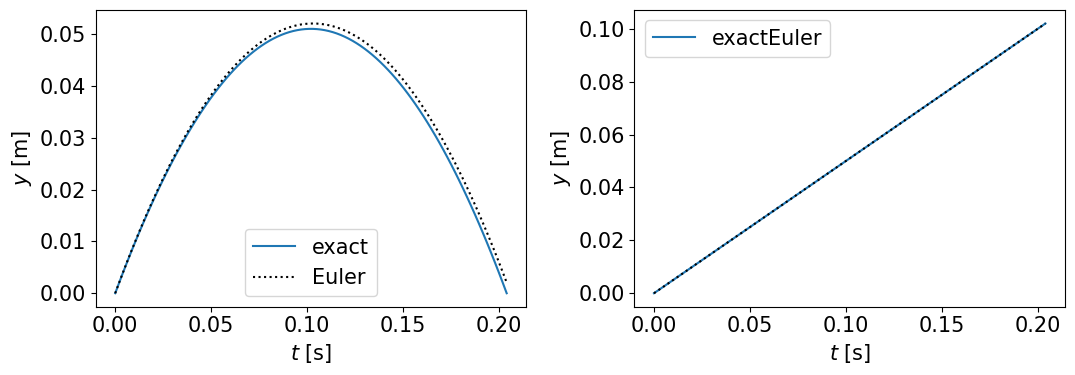

In [8]:
g = 9.8 # m/s
u = 0.5 # m/s
def F(t, Y): # F = [u, v, -g], Y = [y, x, v]
    F = [u, Y[2], -g]
    return np.array(F)

t = np.linspace(0, 2/g, 100)
Y_0 = np.array([0, 0, 1])
y, x, v = zip(*euler_ode(F, Y_0, t))

plt.figure(figsize = [11, 4])

plt.subplot(1, 2, 1)
plt.plot(t, -g/2*t**2 + t, '-', t, x, ':k')
plt.legend(["exact", "Euler"])
plt.xlabel("$t$ [s]")
plt.ylabel("$y$ [m]")

plt.subplot(1, 2, 2)
plt.plot(t, u*t, '-', t, y, ':k')
plt.legend(["exact" "Euler"])
plt.xlabel("$t$ [s]")
plt.ylabel("$y$ [m]")

plt.tight_layout()
plt.show()